In [11]:
# Download dataset in: https://www.kaggle.com/datasets/tasnimniger/fake-news-detection-data

# 1. Import Data

In [12]:
import pandas as np
dataset = np.read_csv('Fake News Detection Dataset.csv')
dataset

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
0,1606,10,4,24,6.176750,1
1,3718,10,8,25,5.826770,1
2,2634,10,7,18,4.619040,1
3,5560,10,6,18,4.961424,1
4,7494,10,4,21,4.114324,1
...,...,...,...,...,...,...
4495,1179,41,7,12,6.963924,0
4496,9445,100,5,15,3.136755,1
4497,4149,100,8,18,3.376823,1
4498,9877,85,14,42,5.331393,0


# 1. Basic statistical

In [13]:
print('What is the total number of articles in the database?')
print('=>', len(dataset))

What is the total number of articles in the database?
=> 4500


In [14]:
print('What is the average number of different sentences and words in each article?')
print('Average of different sentences: ', dataset['Number_of_Sentence'].mean())
print('Average of different words: ', dataset['Unique_Words'].mean())

What is the average number of different sentences and words in each article?
Average of different sentences:  8.934666666666667
Average of different words:  24.94333333333333


# 2. Distribution Column

Distribution of number of sentences in articles?


<Axes: xlabel='Number_of_Sentence', ylabel='Density'>

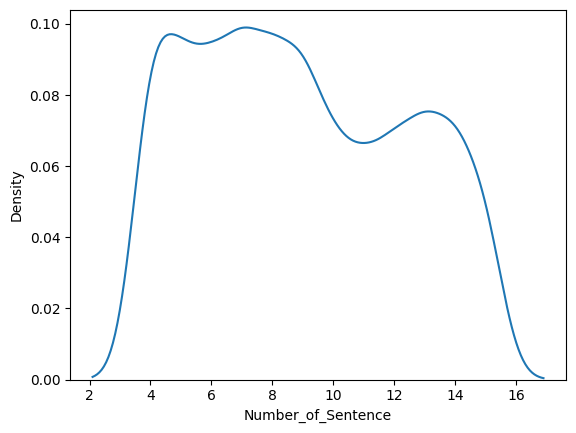

In [15]:
import seaborn as sns
print('Distribution of number of sentences in articles?')
sns.kdeplot(dataset['Number_of_Sentence'])

From the first chart, i see: Number of sentences about 4-8 sentences and 12-16 sentences, but 4-8 sentences is more. Maybe it's because users prefer short articles. However, long articles also appear a lot. That shows that quality articles still appear on the internet.

Distribution of number of word in articles?


<Axes: xlabel='Word_Count', ylabel='Density'>

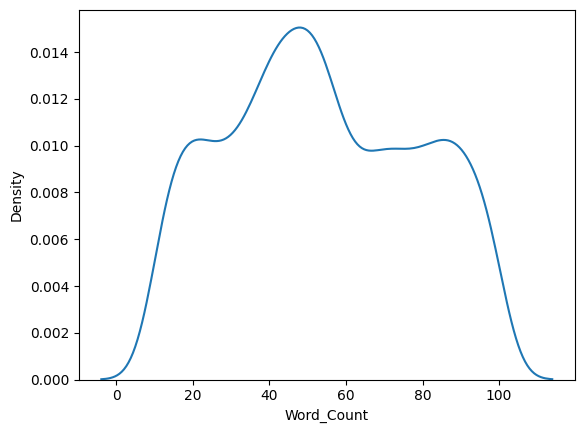

In [16]:
print('Distribution of number of word in articles?')
sns.kdeplot(dataset['Word_Count'])

From the second chart, i see: Articles has 40-60 words is the most famous.

What is the distribution of the average length of all words in articles?


<Axes: xlabel='Average_Word_Length', ylabel='Density'>

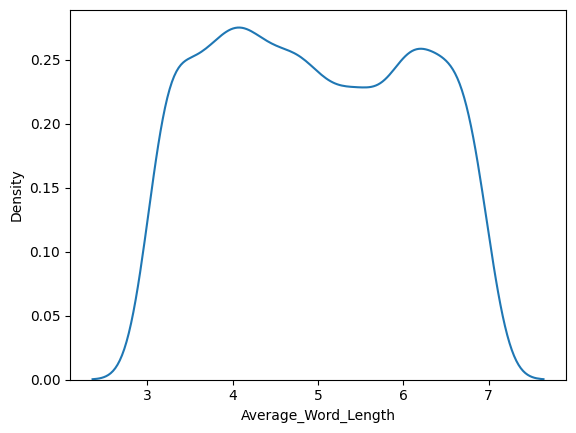

In [17]:
print('What is the distribution of the average length of all words in articles?')
sns.kdeplot(dataset['Average_Word_Length'])

From the 3rd chart chart, i think: It shows 2 groups of articles showing different word lengths, creating variety in writing style and length of articles

# 3. Correlation between columns

In [18]:
print('Table about correlation about sentences and words:')
dataset[['Number_of_Sentence', 'Unique_Words']].corr()

Table about correlation about sentences and words:


,Number_of_Sentence,Unique_Words
Number_of_Sentence,1.000000,0.064588
Unique_Words,0.064588,1.000000


Heatmap about correlation about sentences and words


<Axes: >

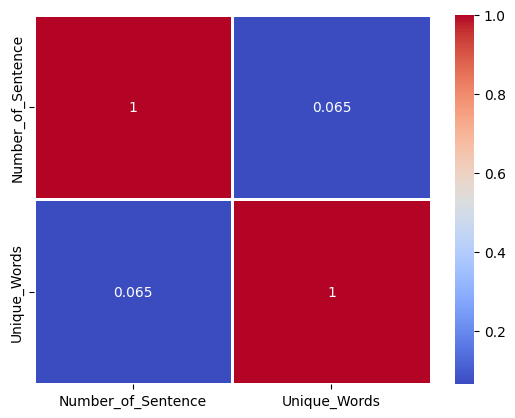

In [19]:
print('Heatmap about correlation about sentences and words')
sns.heatmap(dataset[['Number_of_Sentence', 'Unique_Words']].corr(),cmap='coolwarm',annot=True,linewidths=1)

From above heatmap, i see not correlation about number of sentences and uniques words.

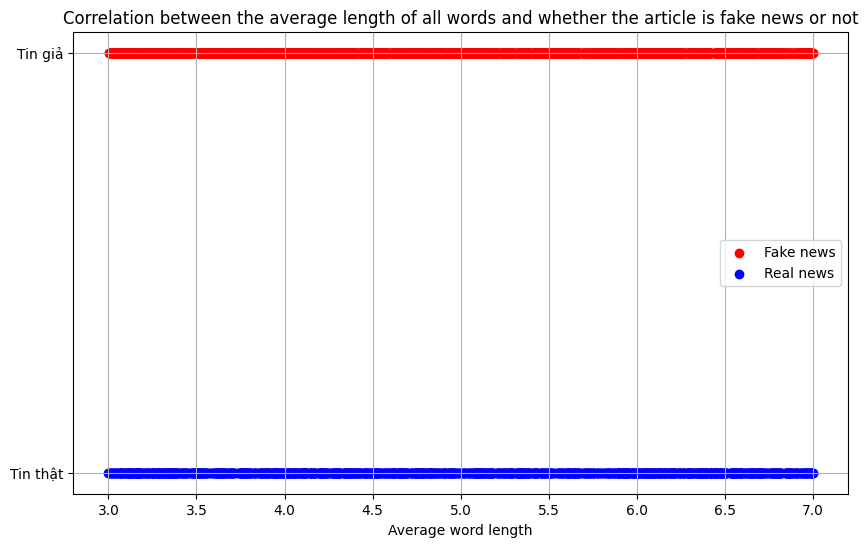

In [20]:
import matplotlib.pyplot as plt

fake_news = dataset[dataset['Label'] == 0]
real_news = dataset[dataset['Label'] == 1]

# Vẽ biểu đồ scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(fake_news['Average_Word_Length'], [1] * len(fake_news), color='red', label='Fake news')
plt.scatter(real_news['Average_Word_Length'], [0] * len(real_news), color='blue', label='Real news')
plt.yticks([0, 1], ['Tin thật', 'Tin giả'])
plt.xlabel('Average word length')
plt.title('Correlation between the average length of all words and whether the article is fake news or not')
plt.legend()
plt.grid(True)
plt.show()


It seems that fake news and real news are evenly spread across all lengths

# 4. Analyze the characteristics of articles based on news type

In [21]:
data_analyze = {'Fake news': [fake_news['Word_Count'].mean(), fake_news['Number_of_Sentence'].mean(), fake_news['Unique_Words'].mean()],
               'Real news': [real_news['Word_Count'].mean(), real_news['Number_of_Sentence'].mean(), real_news['Unique_Words'].mean()]}
row_index = ['Word count average', 'Sentences count average', 'Unique word average']

np.DataFrame(data_analyze, row_index)

,Fake news,Real news
Word count average,54.787206,52.198247
Sentences count average,9.448127,7.890088
Unique word average,27.367584,20.011463


In general, real news still has fewer words and fewer sentences than fake news. However, this information may be wrong because fake news may have a shorter credibility frame than real news.

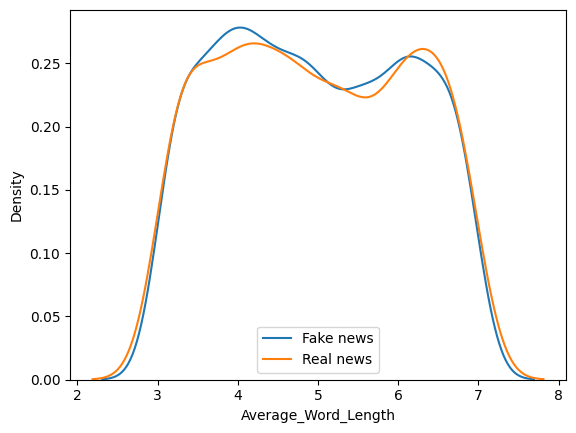

In [22]:
sns.kdeplot(fake_news['Average_Word_Length'], label='Fake news')
sns.kdeplot(real_news['Average_Word_Length'], label='Real news')
plt.legend()



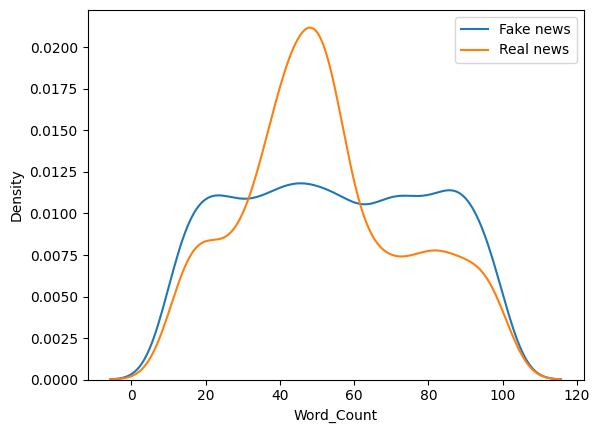

In [23]:
sns.kdeplot(fake_news['Word_Count'], label='Fake news')
sns.kdeplot(real_news['Word_Count'], label='Real news')
plt.legend()



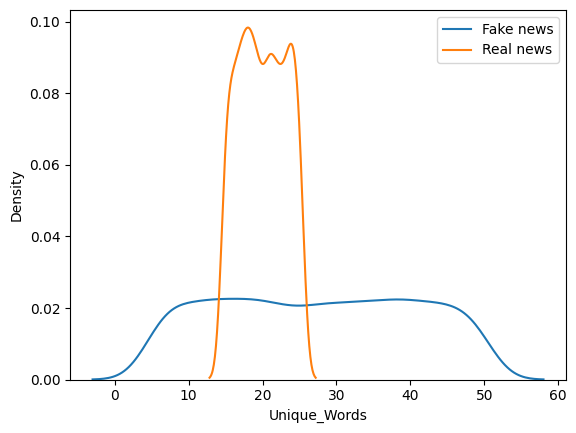

In [24]:
sns.kdeplot(fake_news['Unique_Words'], label='Fake news')
sns.kdeplot(real_news['Unique_Words'], label='Real news')
plt.legend()

We see:
With word count, real news is spread evenly with all the number of words, while fake news is also spread out but with the highest concentration at 30 - 50 words.

With unique word, real news is spread evenly with all the number of words, but fake news is only concentrated with 22 - 28 words.

# 5. Find Outlier

<ipython-input-25-60dca161efac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Number_of_Sentence', data=dataset, palette='rainbow')
<ipython-input-25-60dca161efac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Unique_Words', data=dataset, palette='rainbow')
<ipython-input-25-60dca161efac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Average_Word_Length', data=dataset, palette='rainbow')


<Axes: xlabel='Average_Word_Length'>

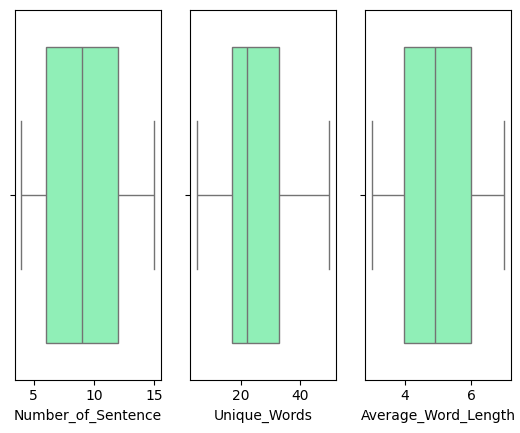

In [25]:
plt.subplot(1, 3, 1)
sns.boxplot(x='Number_of_Sentence', data=dataset, palette='rainbow')
plt.subplot(1, 3, 2)
sns.boxplot(x='Unique_Words', data=dataset, palette='rainbow')
plt.subplot(1, 3, 3)
sns.boxplot(x='Average_Word_Length', data=dataset, palette='rainbow')

There are no outlier posts.

# Summary:
- However, even in the era of short articles, long articles still have a high frequency of appearance.
- Fake news is usually 22-28 words long.